<a href="https://colab.research.google.com/github/yeesem/Deep_Learning/blob/main/Image_Generator_Validation_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-04-07 15:09:05--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.207, 108.177.97.207, 142.251.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  32.1MB/s    in 5.3s    

2024-04-07 15:09:11 (27.0 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-04-07 15:09:16--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.207, 108.177.97.207, 142.251.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  9.32MB/s    in 1.2s    

2024-04-07 15:09:18 (9.32 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [7]:
import zipfile

# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [18]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validaton horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [19]:
train_horse_names = os.listdir(train_house_dir)
print(f'TRAIN SET HORSES : {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS : {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES : {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS : {validation_human_names[:10]}')

TRAIN SET HORSES : ['horse39-2.png', 'horse48-5.png', 'horse13-6.png', 'horse17-9.png', 'horse09-9.png', 'horse12-0.png', 'horse22-4.png', 'horse21-5.png', 'horse24-2.png', 'horse44-5.png']
TRAIN SET HUMANS : ['human04-28.png', 'human13-00.png', 'human03-25.png', 'human06-14.png', 'human07-16.png', 'human09-29.png', 'human12-01.png', 'human13-30.png', 'human13-02.png', 'human13-14.png']
VAL SET HORSES : ['horse4-403.png', 'horse1-436.png', 'horse1-224.png', 'horse4-302.png', 'horse3-440.png', 'horse4-043.png', 'horse2-412.png', 'horse5-181.png', 'horse2-112.png', 'horse5-164.png']
VAL SET HUMANS : ['valhuman02-13.png', 'valhuman01-19.png', 'valhuman03-00.png', 'valhuman05-23.png', 'valhuman01-03.png', 'valhuman03-17.png', 'valhuman05-01.png', 'valhuman02-02.png', 'valhuman04-08.png', 'valhuman03-01.png']


In [20]:
print(f'Total training horse images : {len(train_house_names)}')
print(f'Total training human images : {len(train_human_names)}')
print(f'Total validation horse images : {len(validation_horse_names)}')
print(f'Total validation human images : {len(validation_human_names)}')

Total training horse images : 500
Total training human images : 527
Total validation horse images : 128
Total validation human images : 128


In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

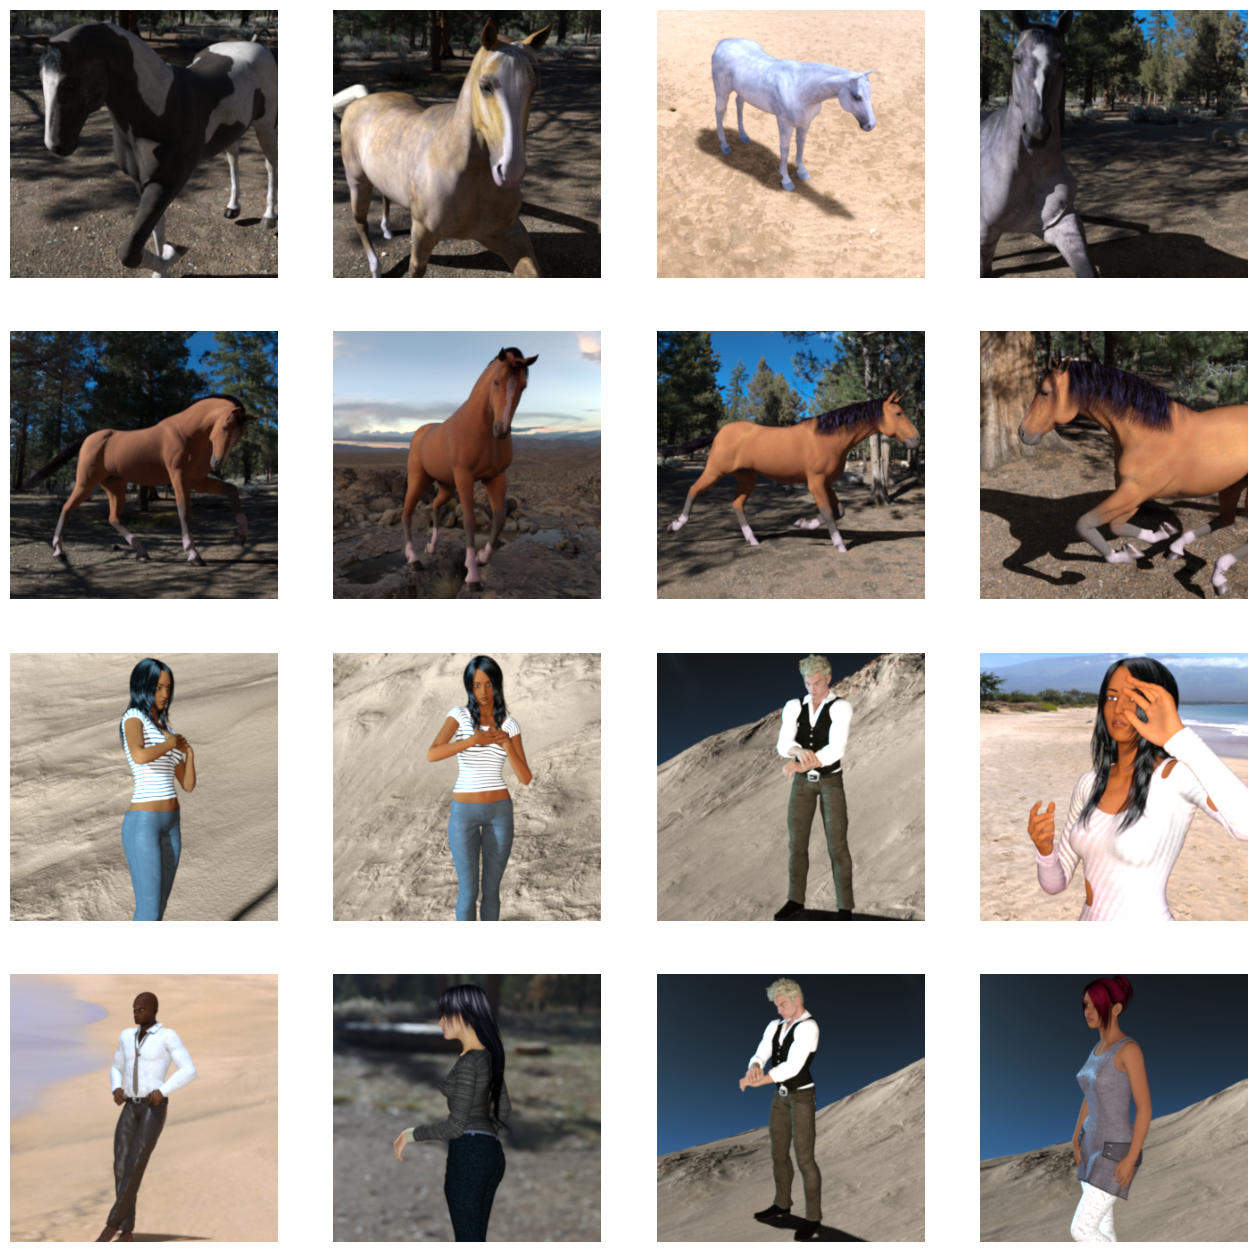

In [24]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4,nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir,fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir,fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [28]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second convolutional layer
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third convolutional layer
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth convolutional layer
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Connected layer
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 35, 35, 64)        0

In [32]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(learning_rate = 0.001),
    metrics = ['accuracy']
)

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

